# 1. BERT소개
**BERT**는 2018년에 개발된 자연어 처리 모델로, 트랜스포머(Transformer) 아키텍처를 기반으로 한다. BERT는 딥 러닝 기술 중 하나인 전이 학습(Transfer Learning)을 사용하여 대규모 텍스트 데이터로 사전훈련(pre-training)된 후 다양한 자연어 처리 작업에 적용할 수 있다는 점에서 혁신적인 모델로 인정받고 있다.  <br/>
<br/>

BERT의 핵심 아이디어는 양방향 언어 모델링(bidirectional language modeling)과 마스킹된 언어 모델링(masked language modeling)을 조합하여 전체 문맥을 고려한 단어의 임베딩을 학습하는 것이다. 이를 위해 BERT는 입력 문장을 여러 개의 토큰(token)으로 분리하고, 각 토큰의 임베딩 값을 학습시킨다. 임베딩 값은 다른 자연어 처리 작업에 사용될 수 있다. <br/>
<br/>

BERT는 사전훈련과 세부 작업 fine-tuning 두 단계로 구성된다. 사전훈련 단계에서는 대량의 텍스트 데이터로 모델을 사전훈려하여 언어적인 특성을 학습한다. 그리고 fine-tuning 단계에서는 특정 자연어 처리 작업에 맞게 BERT를 세부 조정하여 해당 작업을 수행한다. 예를 들어, 문장 분류, 개체명 인식, 질의 응답 등 다양한 작업에 BERT를 적용할 수 있다. <br/>
<br/>

BERT는 자연어 처리 분야에서 다양한 작업에서 높은 성능을 보여주었으며, 이후 많은 연구와 응용에서 활발하게 사용되고 있다. BERT를 비롯한 전이 학습 모델들은 텍스트 이해와 자연어 처이의 다양한 과제를 해결하는 데 큰 도움을 주고 있으며, 자연어 처리 분야에서 혁신적인 발전을 이끌고 있는 중요한 모델 중 하나다.

# 2. 설정

In [1]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 19.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 114.1 MB/s eta 0:00:00


In [2]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


# 3. 감정 분석
이 노트북은 텍스트를 기반으로 양 또는 음으로 분류 영화 리뷰에 감정 분석 모델을 훈련한다.

## 3-1. IMDB 데이터세트 다운로드

In [5]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar = True, cache_dir = '.',
                                  cache_subdir = '')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

**shutil.rmtree(remove_dir)**: 지정한 디렉토리와 그 하위 디렉토리가 모두 삭제됩니다. 삭제 작업은 재귀적으로 이루어지므로, 디렉토리 내에 포함된 모든 파일과 하위 디렉토리가 삭제됩니다.

In [6]:
AUTOTUNE = tf.data.AUTOTUNE # 데이터셋 성능 향상을 위한 매개변수
batch_size = 32 # 데이터를 미니배치로 처리할 때 배치 크기
seed = 42 # 난수 발생 시트, 재현성을 위해 사용

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2, # 데이터 분할 비율 80% 학습 데이터 사용
    subset = 'training', # 사용할 하위셋(subset)
    seed = seed
)

class_names = raw_train_ds.class_names # 클래스(레이블)의 이름을 가져옴
train_ds = raw_train_ds.cache().prefetch(buffer_size = AUTOTUNE) # 데이터를 메모리나 로컬 디스크에 캐시하여 데이터 읽기 성능 향상

val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'validation',
    seed = seed
)

val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size = batch_size
)

test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


몇 가지 리뷰를 살펴보겠습니다.

In [7]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(3):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label: {label} ({class_names[label]})')

Review: b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label: 0 (neg)
Review: b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they 

# 4. TensorFlow Hub에서 모델 로드

In [8]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


# 5. 전처리 모델
텍스트 입력은 BERT에 입력되기 전에 숫자 토큰 ID로 변환되고 여러 텐서로 정렬되어야 합니다. TensorFLow Hub은 위에서 설명한 각 BERT 모델에 대해 일치하는 전처리 모델을 제공하며, 이는 TF.text 라이브러리의 TF 작업을 사용하여 이 변환을 구현합니다. 텍스트를 사전 처리하기 위해 TensorFLow 모델 외부에서 순수 Python 코드를 실행할 필요는 없습니다.

In [9]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

일부 텍스트에 대한 전처리 모델을 시도하고 출력을 살펴보겠습니다.

In [10]:
text_test = ['this is such an amazing movie!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 2023 2003 2107 2019 6429 3185  999  102    0    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


# 6. BERT 모델 사용

In [11]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [12]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.7626294   0.9928099  -0.18611868  0.3667384   0.15233697  0.6550447
  0.9681154  -0.94862723  0.00216173 -0.9877732   0.06842681 -0.97630596]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.2894635   0.34321314  0.33231482 ...  0.21300751  0.7102076
  -0.0577114 ]
 [-0.2874215   0.31981048 -0.23018587 ...  0.5845506  -0.21329802
   0.72692144]
 [-0.6615703   0.68876755 -0.87433    ...  0.10877246 -0.26173204
   0.47855428]
 ...
 [-0.22561137 -0.2892561  -0.07064435 ...  0.47566015  0.8327713
   0.4002532 ]
 [-0.29824218 -0.27473158 -0.05450481 ...  0.4884971   1.0955353
   0.18163383]
 [-0.4437822   0.00930763  0.07223707 ...  0.1729007   1.1833245
   0.07898022]]


# 7. 모델 정의
전처리 모델, 선택된 BERT 모델, 하나의 Dense 및 Dropout 레이어를 사용하여 매우 간단한 미세 조정 모델을 생성합니다.

In [13]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name = 'preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable = True, name = 'BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation = None, name = 'classifier')(net)
  return tf.keras.Model(text_input, net)

**text_input**: 텍스트 입력을 받기 위한 TensorFlow Keras의 'Input'레이어입니다. <br/>

**preprocessing_layer**: 텍스트 데이터를 전처리하기 위한 TensorFlow Hub의 Keras 레이어인 'preprocessing'입니다. 이 레이어는 입력된 텍스트를 전처리하여 BERT 모델에 입력으로 사용할 수 있는 형태로 변환합니다. <br/>

**encoder_inputs**: 'preprocessing_layer'를 사용하여 전처리된 텍스트를 입력으로 받는 레이어입니다. <br/>

**encoder**: TensorFlow Hub의 Keras 레이어인 'BERT_encoder'로, 사전 훈련된 BERT 모델을 가져와서 전처리된 입력을 BERT 인코딩으로 변환합니다. <br/>

**output**: 'encoder'를 통과한 결과입니다.<br/>

**net**: 'output'에서 추출한 BERT 모델의 'pooled_output'을 나타냅니다. 'pooled_output'은 문장 수준의 표현을 담고 있습니다. **net**에는 10%의 드롭아웃(Dropout)을 적용한 후, 하나의 출력 뉴런만 있는 밀집(Dense) 레이어인 'classifier'를 추가합니다. <br/>

In [14]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.4210528]], shape=(1, 1), dtype=float32)


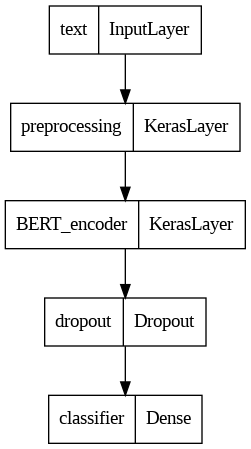

In [16]:
# 모델 구조
tf.keras.utils.plot_model(classifier_model)

# 8. 모델 교육
이제 전처리 모듈, BERT 인코더, 데이터 및 분류기를 포함하여 모델을 훈련하는 데 필요한 모든 부분이 있습니다.

## 8-1. 손실 기능
이 이진 분류 문제는 상기 모델은 확률 (단일 단위 층)을 출력합니다.

In [17]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits = True)
metrics = tf.metrics.BinaryAccuracy()

## 8-2. 옵티마이저
미세 조정을 위해 BERT가 원래 훈련된 것과 동일한 최적화 프로그램인 Adam을 사용하겠습니다. 이 최적화는 예측 손실을 최소화하는 것으로 알려져있습니다.

In [18]:
epochs = 5 # 훈련할 에포크의 수
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy() # 한 에포크 동안 수행할 스탭 수
num_train_steps = steps_per_epoch * epochs # 전체 훈련 스텝의 수
num_warmup_steps = int(0.1 * num_train_steps) # 초기 학습률을 점진적으로 증가시키는 웜업 스텝의 수

init_lr = 3e-5 # 초기 학습률의 값
optimizer = optimization.create_optimizer(init_lr = init_lr,
                                          num_train_steps = num_train_steps,
                                          num_warmup_steps = num_warmup_steps,
                                          optimizer_type = 'adamw')

## 8-3. BERT 모델 로드 및 학습

In [19]:
classifier_model.compile(optimizer = optimizer,
                         loss = loss,
                         metrics = metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x = train_ds,
                               validation_data = val_ds,
                               epochs = epochs)

## 8-4. 모델 평가
모델이 어떻게 작동하는지 보겠습니다.

In [ ]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

## 8-5. 시간 경과에 따른 정확도 및 손실 플로팅

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

훈련시키는 내용은 환경상 어려워 실행하지 않았습니다.

# 9. 참고 문헌
<https://www.tensorflow.org/text/tutorials/classify_text_with_bert?hl=ko>